# Image Processing

In [2]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import requests

In [3]:
def display_img(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [4]:
# Image URL = "https://raw.githubusercontent.com/cw512/Image-Processing/main/seagull.png"
image = cv2.imread('seagull.png')

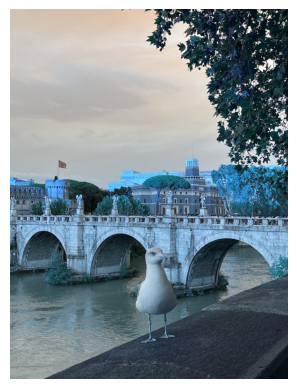

In [5]:
display_img(image)

## Gaussian Blur

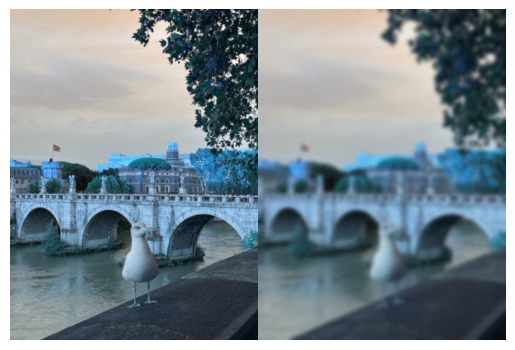

In [6]:
image_gblur = cv2.GaussianBlur(image, (7,7),0)
image_gblur2 = cv2.GaussianBlur(image, (49,49),0)

# Side by side images for easier viewing
fig, ax = plt.subplots(1,2)
ax[0].imshow(image_gblur)
ax[0].axis('off')

ax[1].imshow(image_gblur2)
ax[1].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)

## RGB Channels

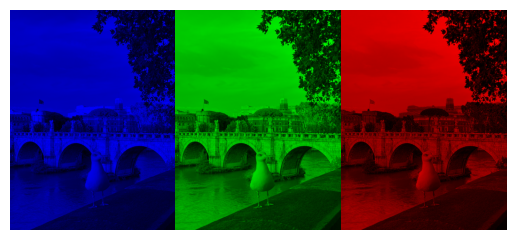

In [7]:
image_blue = image.copy()
# Set green and red channels to 0
image_blue[:, :, 0] = 0
image_blue[:, :, 1] = 0

image_green = image.copy()
# Set blue and red channels to 0
image_green[:, :, 0] = 0
image_green[:, :, 2] = 0

image_red = image.copy()
# Set blue and green channels to 0
image_red[:, :, 1] = 0
image_red[:, :, 2] = 0

# Side by side images for easier viewing
fig, ax = plt.subplots(1,3)
ax[0].imshow(image_blue)
ax[0].axis('off')

ax[1].imshow(image_green)
ax[1].axis('off')

ax[2].imshow(image_red)
ax[2].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)

## Grayscale

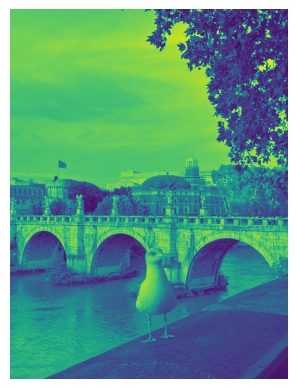

In [8]:
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

display_img(image_gray)

## Canny Edge Detection

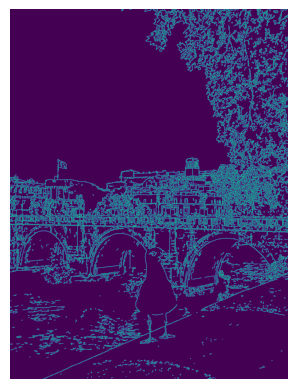

In [9]:
image_edge = cv2.Canny(image,150,250)

display_img(image_edge)

## Edge Detection

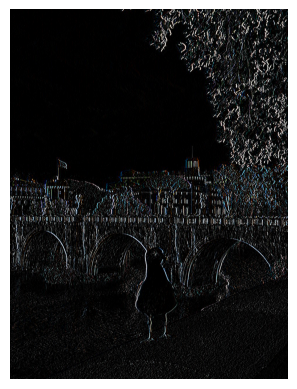

In [10]:
kernel = np.array([[-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]])

image_edge2 = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
display_img(image_edge2)

### Image Sharpening

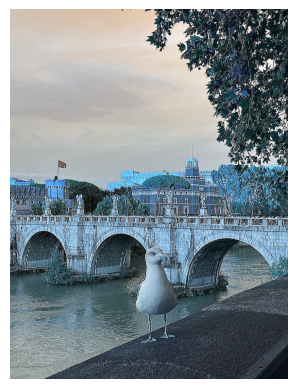

In [11]:
kernel = np.array([[-1, 1, -1],
                [-1, 5, -1],
                [-1, 1, -1]])

image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
display_img(image_sharp)

## Masking - Extracting green regions of image

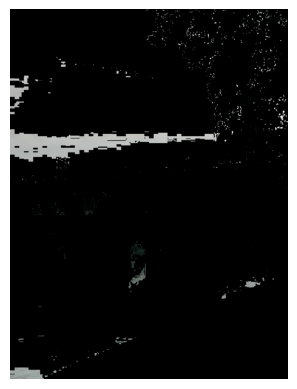

In [12]:
# Convert image colour space to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds
lower_green = np.array([36,0,0])
upper_green = np.array([85,255,255])

# Mask
mask = cv2.inRange(hsv,lower_green,upper_green)

# Apply mask to image
image_masked = cv2.bitwise_and(image, image, mask=mask)

display_img(image_masked)